In [54]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
%matplotlib inline
imdb_top = pd.read_csv('/Users/cguy/kelstuff/ga_summer_2016/imdb_top_raw.csv')
imdb_top

,Unnamed: 0,DVD,Production,actors,awards,country,director,genre,imdbID,imdbRating,...,tomatoUserRating,tomatoUserReviews,writer,can_rate,image,num_votes,rating_y,tconst,type,year
0,0,27 Jan 1998,Columbia Pictures,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 15 wins & 21 n...,USA,Frank Darabont,"Crime, Drama",tt0111161,9.3,...,4.4,881281.0,Stephen King (short story &quot;Rita Hayworth ...,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1679754,9.3,tt0111161,feature,1994
1,1,09 Oct 2001,Paramount Pictures,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama",tt0068646,9.2,...,4.4,728130.0,"Mario Puzo (screenplay), Francis Ford Coppola ...",True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1149267,9.2,tt0068646,feature,1972
2,2,24 May 2005,Paramount Pictures,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",Won 6 Oscars. Another 10 wins & 20 nominations.,USA,Francis Ford Coppola,"Crime, Drama",tt0071562,9.0,...,4.3,408467.0,"Francis Ford Coppola (screenplay), Mario Puzo ...",True,{u'url': u'http://ia.media-imdb.com/images/M/M...,785960,9.0,tt0071562,feature,1974
3,3,09 Dec 2008,Warner Bros. Pictures/Legendary,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Won 2 Oscars. Another 146 wins & 142 nominations.,"USA, UK",Christopher Nolan,"Action, Adventure, Crime",tt0468569,9.0,...,4.4,1822797.0,"Jonathan Nolan (screenplay), Christopher Nolan...",True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1664826,9.0,tt0468569,feature,2008
4,4,09 Mar 2004,Universal Pictures,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",Won 7 Oscars. Another 71 wins & 33 nominations.,USA,Steven Spielberg,"Biography, Drama, History",tt0108052,8.9,...,4.3,408061.0,"Thomas Keneally (book), Steven Zaillian (scree...",True,{u'url': u'http://ia.media-imdb.com/images/M/M...,859708,8.9,tt0108052,feature,1993
5,5,06 Mar 2001,Criterion Collection,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Nominated for 3 Oscars. Another 16 wins & 8 no...,USA,Sidney Lumet,"Crime, Drama",tt0050083,8.9,...,4.2,102735.0,"Reginald Rose (story), Reginald Rose (screenplay)",True,{u'url': u'http://ia.media-imdb.com/images/M/M...,444426,8.9,tt0050083,feature,1957
6,6,19 May 1998,Miramax Films,"Tim Roth, Amanda Plummer, Laura Lovelace, John...",Won 1 Oscar. Another 54 wins & 60 nominations.,USA,Quentin Tarantino,"Crime, Drama",tt0110912,8.9,...,4.2,1121671.0,"Quentin Tarantino (story), Roger Avary (story)...",True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1316623,8.9,tt0110912,feature,1994
7,7,25 May 2004,New Line Cinema,"Noel Appleby, Ali Astin, Sean Astin, David Aston",Won 11 Oscars. Another 174 wins & 113 nominati...,"USA, New Zealand",Peter Jackson,"Action, Adventure, Drama",tt0167260,8.9,...,3.7,34675430.0,"J.R.R. Tolkien (novel), Fran Walsh (screenplay...",True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1208649,8.9,tt0167260,feature,2003
8,8,18 Nov 1997,United Artists,"Eli Wallach, Clint Eastwood, Lee Van Cleef, Al...",1 win & 1 nomination.,"Italy, Spain, West Germany",Sergio Leone,Western,tt0060196,8.9,...,4.0,237705.0,"Luciano Vincenzoni (story), Sergio Leone (stor...",True,{u'url': u'http://ia.media-imdb.com/images/M/M...,500519,8.9,tt0060196,feature,1966
9,9,06 Jun 2000,20th Century Fox,"Edward Norton, Brad Pitt, Meat Loaf, Zach Grenier",Nominated for 1 Oscar. Another 8 wins & 31 nom...,"USA, Germany",David Fincher,Drama,tt0137523,8.9,...,4.2,1088518.0,"Chuck Palahniuk (novel), Jim Uhls (screenplay)",True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1338732,8.8,tt0137523,feature,1999


In [55]:
imdb_top.drop(['Unnamed: 0'], axis=1, inplace=True)
imdb_top.head(1)

,DVD,Production,actors,awards,country,director,genre,imdbID,imdbRating,imdbVotes,...,tomatoUserRating,tomatoUserReviews,writer,can_rate,image,num_votes,rating_y,tconst,type,year
0,27 Jan 1998,Columbia Pictures,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 15 wins & 21 n...,USA,Frank Darabont,"Crime, Drama",tt0111161,9.3,"1,668,622",...,4.4,881281.0,Stephen King (short story &quot;Rita Hayworth ...,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1679754,9.3,tt0111161,feature,1994


In [56]:
imdb_top.dtypes

DVD                   object
Production            object
actors                object
awards                object
country               object
director              object
genre                 object
imdbID                object
imdbRating           float64
imdbVotes             object
language              object
metascore            float64
plot                  object
rating_x              object
released              object
runtime               object
title                 object
tomatoConsensus       object
tomatoFresh          float64
tomatoImage           object
tomatoMeter          float64
tomatoRating         float64
tomatoReviews        float64
tomatoRotten         float64
tomatoUserMeter      float64
tomatoUserRating     float64
tomatoUserReviews    float64
writer                object
can_rate                bool
image                 object
num_votes              int64
rating_y             float64
tconst                object
type                  object
year          

In [57]:
imdb_top.isnull().sum()

DVD                   5
Production            6
actors                0
awards                7
country               0
director              0
genre                 0
imdbID                0
imdbRating            1
imdbVotes             1
language              1
metascore            82
plot                  2
rating_x              3
released              3
runtime               2
title                 0
tomatoConsensus      36
tomatoFresh           7
tomatoImage           7
tomatoMeter           7
tomatoRating          7
tomatoReviews         7
tomatoRotten          7
tomatoUserMeter       5
tomatoUserRating      5
tomatoUserReviews     3
writer                1
can_rate              0
image                 0
num_votes             0
rating_y              0
tconst                0
type                  0
year                  0
dtype: int64

In [58]:
all_ratings = imdb_top[['title','imdbRating', 'imdbVotes', 'metascore', 'tomatoFresh', \
                'tomatoMeter', 'tomatoRating', 'tomatoRotten', 'tomatoUserMeter', 'tomatoUserRating', 'tomatoUserReviews']]

In [59]:
all_ratings

#drop rating_y (bcuz it's the equivqlent to imdbRating)

,title,imdbRating,imdbVotes,metascore,tomatoFresh,tomatoMeter,tomatoRating,tomatoRotten,tomatoUserMeter,tomatoUserRating,tomatoUserReviews
0,The Shawshank Redemption,9.3,"1,668,622",80.0,60.0,91.0,8.2,6.0,98.0,4.4,881281.0
1,The Godfather,9.2,"1,140,778",100.0,83.0,99.0,9.2,1.0,98.0,4.4,728130.0
2,The Godfather: Part II,9.0,"784,338",80.0,70.0,97.0,9.5,2.0,97.0,4.3,408467.0
3,The Dark Knight,9.0,"1,652,832",82.0,298.0,94.0,8.6,19.0,94.0,4.4,1822797.0
4,Schindler's List,8.9,"851,787",93.0,82.0,96.0,9.0,3.0,97.0,4.3,408061.0
5,12 Angry Men,8.9,"440,276",NaN,48.0,100.0,8.9,0.0,97.0,4.2,102735.0
6,Pulp Fiction,8.9,"1,312,930",94.0,72.0,94.0,9.1,5.0,96.0,4.2,1121671.0
7,The Lord of the Rings: The Return of the King,8.9,"1,203,394",94.0,248.0,95.0,8.7,14.0,86.0,3.7,34675430.0
8,"The Good, the Bad and the Ugly",8.9,"499,475",90.0,66.0,97.0,8.8,2.0,97.0,4.0,237705.0
9,Fight Club,8.9,"1,335,613",66.0,128.0,79.0,7.3,34.0,96.0,4.2,1088518.0


In [60]:
index = 0
for vote in all_ratings['imdbVotes']:
    if type(vote) == str:
        all_ratings['imdbVotes'].iloc[index] = int(vote.replace(",", ""))
    index += 1


/Users/cguy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [61]:
all_ratings.head()

,title,imdbRating,imdbVotes,metascore,tomatoFresh,tomatoMeter,tomatoRating,tomatoRotten,tomatoUserMeter,tomatoUserRating,tomatoUserReviews
0,The Shawshank Redemption,9.3,1668622,80.0,60.0,91.0,8.2,6.0,98.0,4.4,881281.0
1,The Godfather,9.2,1140778,100.0,83.0,99.0,9.2,1.0,98.0,4.4,728130.0
2,The Godfather: Part II,9.0,784338,80.0,70.0,97.0,9.5,2.0,97.0,4.3,408467.0
3,The Dark Knight,9.0,1652832,82.0,298.0,94.0,8.6,19.0,94.0,4.4,1822797.0
4,Schindler's List,8.9,851787,93.0,82.0,96.0,9.0,3.0,97.0,4.3,408061.0


In [62]:
all_ratings.dtypes

title                 object
imdbRating           float64
imdbVotes             object
metascore            float64
tomatoFresh          float64
tomatoMeter          float64
tomatoRating         float64
tomatoRotten         float64
tomatoUserMeter      float64
tomatoUserRating     float64
tomatoUserReviews    float64
dtype: object

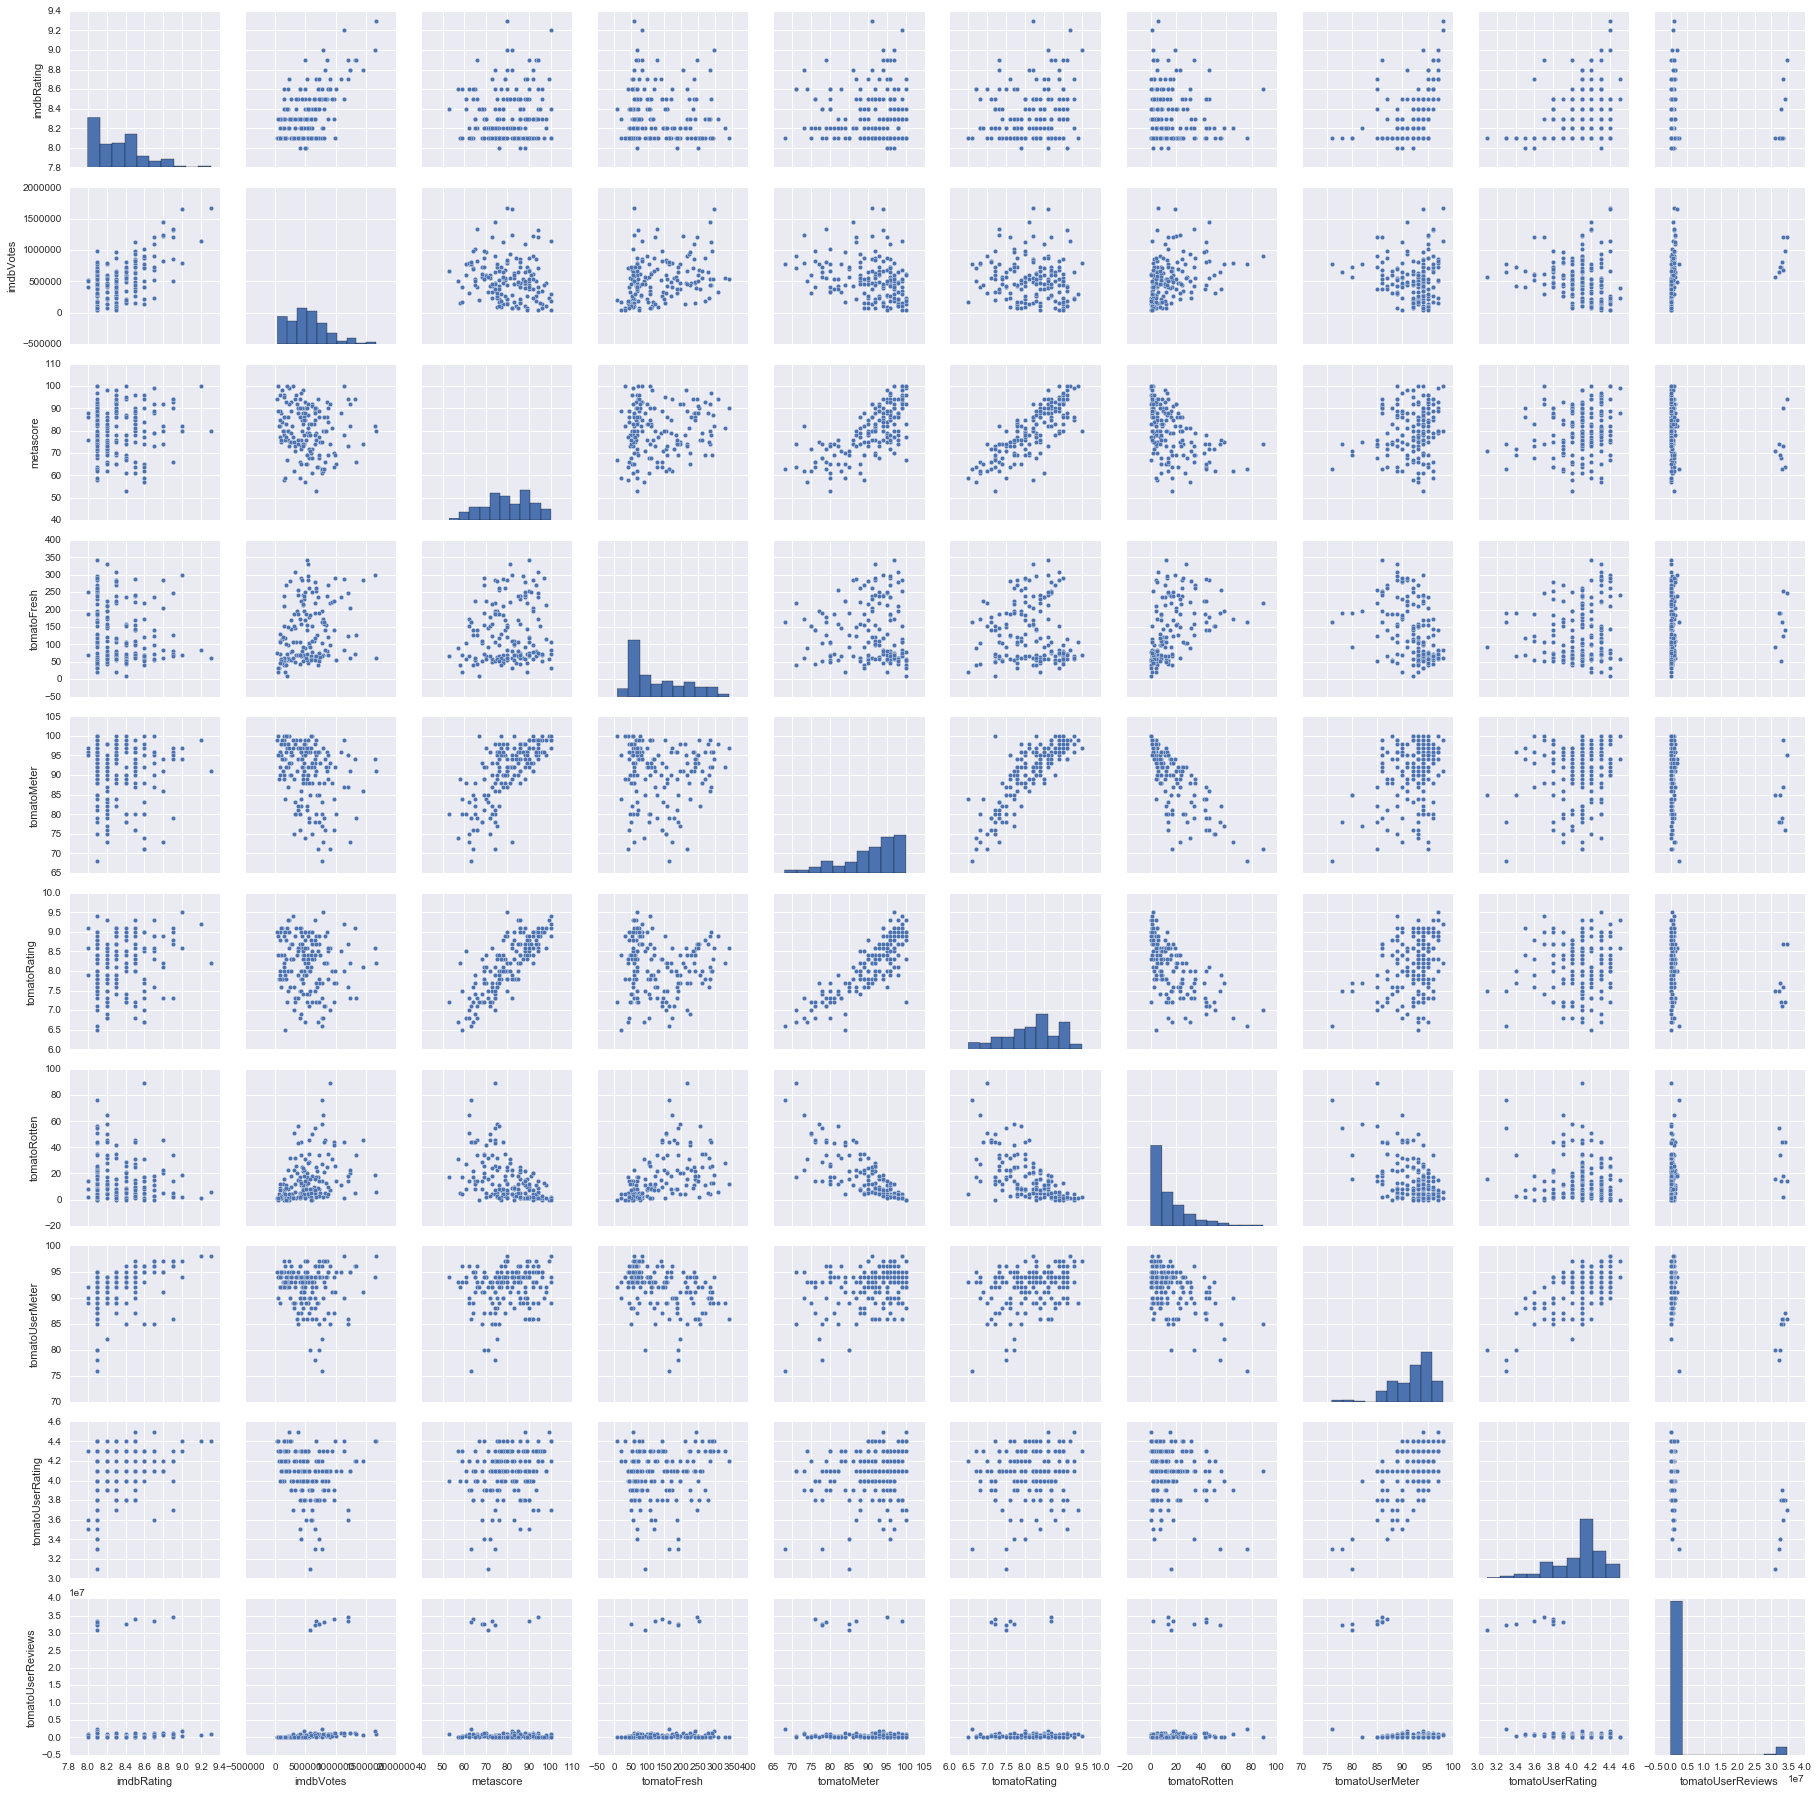

In [82]:
all_rats_nonan = all_ratings.dropna()

sns.pairplot(all_rats_nonan)

In [74]:
from sklearn import preprocessing

all_rats_nonan = all_ratings.dropna()

ratings = preprocessing.scale(all_rats_nonan[['imdbRating', 'imdbVotes', 'metascore', 'tomatoFresh', \
                'tomatoMeter', 'tomatoRating', 'tomatoRotten', 'tomatoUserMeter', 'tomatoUserRating', 'tomatoUserReviews']])

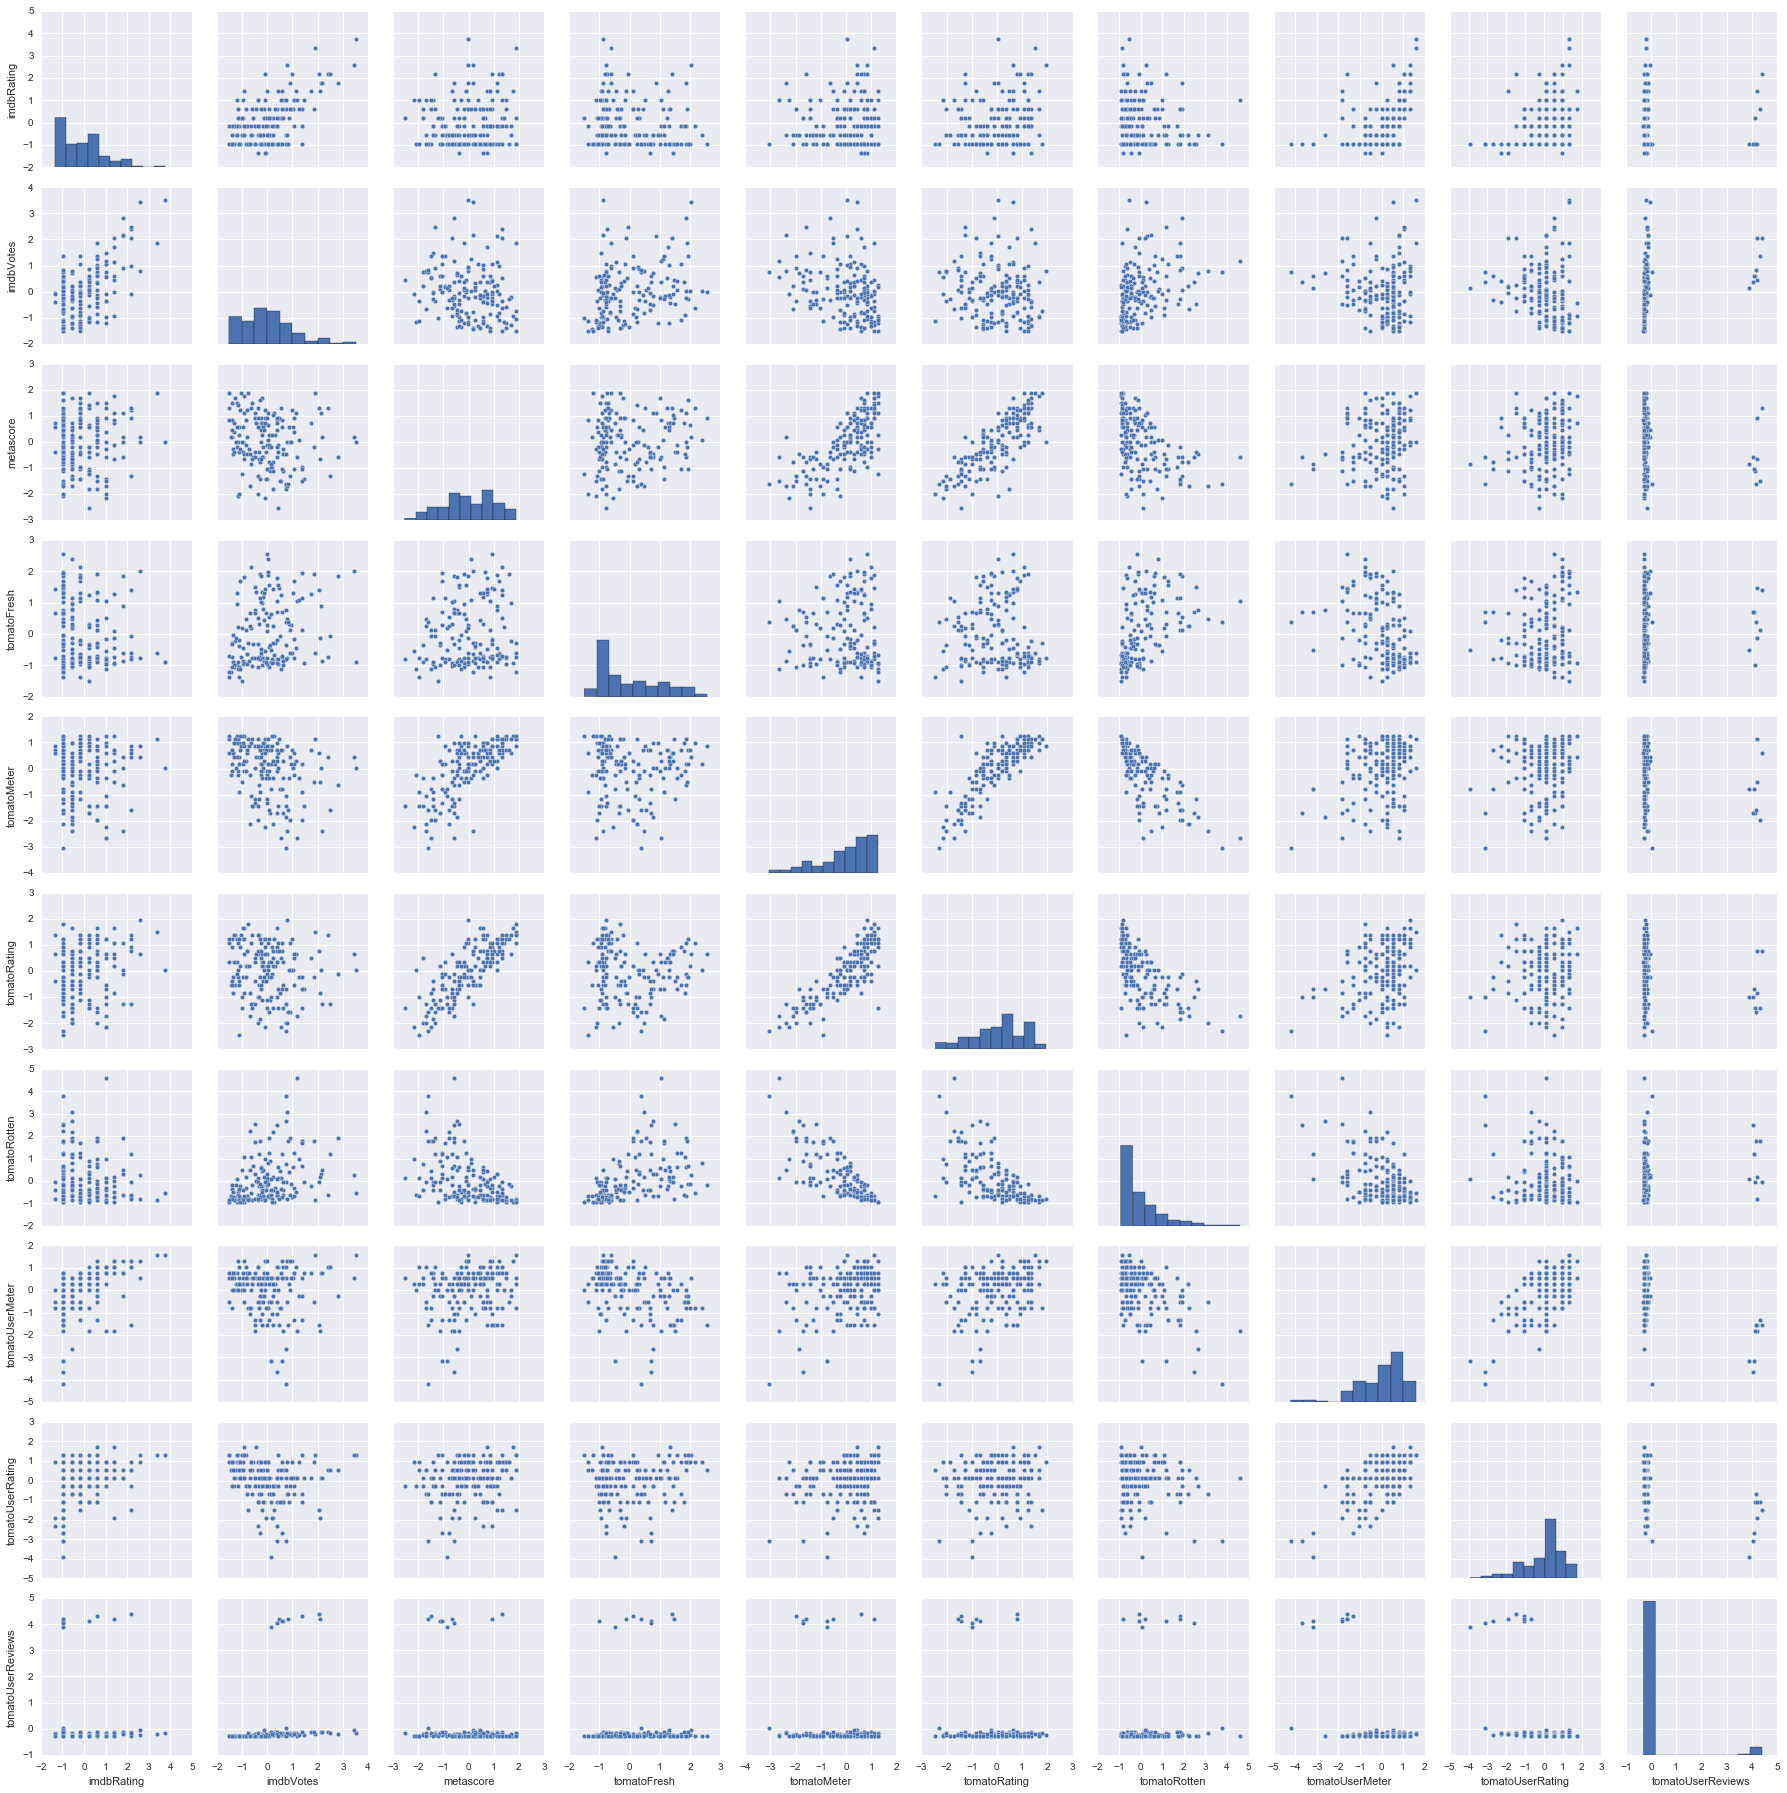

In [80]:
ratings = pd.DataFrame(ratings)
ratings.columns = ['imdbRating', 'imdbVotes', 'metascore', 'tomatoFresh', \
                'tomatoMeter', 'tomatoRating', 'tomatoRotten', 'tomatoUserMeter', 'tomatoUserRating', 'tomatoUserReviews']

sns.pairplot(ratings)


DATA CLEANING PLAN:

1) Drop columns that can't be leveraged or don't seem to offer anything of value.....
2) NaNs
3) for NaNs, see if any other columns can serve as proxy
4) proper types
5) parse strings/compounded vars
6) try to pull out info from some vars...
7) 
8) Figure out why one title is missing
9) add data and clean for lowest 100 movies...


This week, we learned about ensemble methods, APIs, and natural language processing. Now we're going to put these skills to the test. You've been hired by Netflix to examine what factors lead to certain ratings for movies. Given that Netflix does not currently store this type of data, your boss has suggested that you collect ratings and reviews data from IMDB. Netflix is no stranger to machine learning, however:

Netflix uses random forests and decision trees to predict what types of movies an individual user may like.
Using unsupervised learning techniques, they are able to continually update suggestions, listings, and other features of it's user interface.
Netflix, however, hasn't focused on collecting data on the top movies of all time, and would like to add some of them to their offerings based on popularity and other factors.

Point: Your boss isn't sure where to start on this project, so your task is to collect the data and construct a random forest to understand what factors contribute to ratings.


Acquire data from IMDB, and use whatever metrics you can collect to predict whether it is a good movie.

When you've finished your analysis, Netflix would like a report detailing your findings, with recommendations as to next steps.

Here are some questions to keep in mind:

What factors are the most direct predictors of rating?
You can use rating as your target variable. But it's up to you whether to treat it as continuous, binary, or multiclass.
Goal: Completed Jupyter notebook that includes modeling using a random forest and an blog post explaining your findings.

This is deliberately open ended. There is no starter code. It's up to you how to acquire the data, store the data, and what features you want to use.

We expect you to use a tree-based model, but the rest of the decisions are up to you.

We will be looking for the following things:

A clear problem statement & description of the goals of your study to be included in the final report

Data from IMDB

Cleaned and refined data

Visualization. Plots that describe your data and evaluate your model.

Tree-based models (use any combination of ensemble techniques: random forests, bagging, boosting).

A blog post presenting the results of your findings as a report to Netflix, including:
a problem statement, summary statistics of the various factors (e.g. year, number of ratings, etc.), your model, at least 2 graphics, and your recommendations for next steps!